In [ ]:
from google.colab import drive
from google.colab import files
import os
import random
from shutil import copyfile
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import callbacks
from keras.preprocessing import image

In [ ]:
drive.mount ('/content/drive/')

Mounted at /content/drive/


In [ ]:
base_dir = '/content/drive/MyDrive/datasets'
!ls "/content/drive/MyDrive/datasets"

image  test  train


In [ ]:
image_dir = os.path.join(base_dir, 'image')
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [ ]:
fresh_bread_dir = os.path.join(image_dir, 'roti yang masih layak dikonsumsi')
rotten_bread_dir = os.path.join(image_dir, 'roti kadaluarsa')
print ("Jumlah Data Gambar Tiap Kategori")
print('Jumlah gambar roti yang masih layak dikonsumsi  :', len(os.listdir(fresh_bread_dir )))
print('Jumlah gambar roti kadaluarsa  :', len(os.listdir(rotten_bread_dir )))

Jumlah Data Gambar Tiap Kategori
Jumlah gambar roti yang masih layak dikonsumsi  : 457
Jumlah gambar roti kadaluarsa  : 264


In [ ]:
train_fresh_bread = os.path.join(train_dir, 'roti yang masih layak dikonsumsi/')
train_rotten_bread = os.path.join(train_dir, 'roti kadaluarsa/')

test_fresh_bread = os.path.join(test_dir, 'roti yang masih layak dikonsumsi/')
test_rotten_bread = os.path.join(test_dir, 'roti kadaluarsa/')

### Splitting data

In [ ]:
def train_test_split(source, train, test, train_ratio):
  total_files = os.listdir(source)
  total_size = len(total_files)
  train_size = int(train_ratio * total_size)
  test_size = total_size - train_size

  randomized = random.sample(total_files, total_size)
  train_files = randomized[0:train_size]
  test_files = randomized[train_size:total_size]

  for i in train_files:
    i_file = os.path.join(source, i)
    destination = os.path.join(train, i)
    copyfile(i_file, destination)

  for i in test_files:
    i_file = os.path.join(source, i)
    destination = os.path.join(test, i)
    copyfile(i_file, destination)

train_ratio = 0.8

source_00 = fresh_bread_dir
train_00 = train_fresh_bread
test_00 = test_fresh_bread
train_test_split(source_00, train_00, test_00, train_ratio)

source_01 = rotten_bread_dir
train_01 = train_rotten_bread
test_01 = test_rotten_bread
train_test_split(source_01, train_01, test_01, train_ratio)

In [ ]:
print('Jumlah data gambar roti yang masih layak dikonsumsi  :', len(os.listdir(fresh_bread_dir)))
print('Jumlah data train roti yang masih layak dikonsumsi   :', len(os.listdir(train_fresh_bread)))
print('Jumlah data test roti yang masih layak dikonsumsi   :', len(os.listdir(test_fresh_bread)))

Jumlah data gambar roti yang masih layak dikonsumsi  : 457
Jumlah data train roti yang masih layak dikonsumsi   : 365
Jumlah data test roti yang masih layak dikonsumsi   : 92


In [ ]:
print('Jumlah data gambar roti kadaluarsa   :', len(os.listdir(rotten_bread_dir)))
print('Jumlah data train roti kadaluarsa   :', len(os.listdir(train_rotten_bread)))
print('Jumlah data test roti kadaluarasa   :', len(os.listdir(test_rotten_bread)))

Jumlah data gambar roti kadaluarsa   : 264
Jumlah data train roti kadaluarsa   : 211
Jumlah data test roti kadaluarasa   : 53


In [ ]:
%matplotlib inline

#Parameter graph
n_rows = 4
n_cols = 4
iterating_index = 0


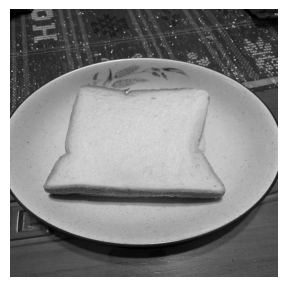

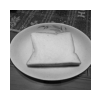

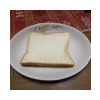

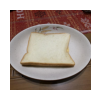

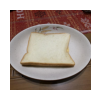

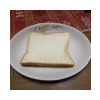

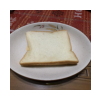

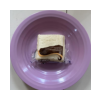

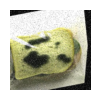

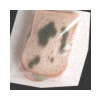

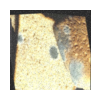

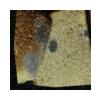

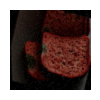

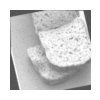

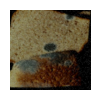

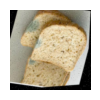

In [ ]:
fig = plt.gcf()
fig.set_size_inches(n_cols*4, n_rows*4)

iterating_index += 8

next_freshbread_pix = [os.path.join(fresh_bread_dir, fname)
                for fname in os.listdir(fresh_bread_dir)[iterating_index-8:iterating_index]
               ]

next_rottenbread_pix = [os.path.join(rotten_bread_dir, fname)
                for fname in os.listdir(rotten_bread_dir)[iterating_index-8:iterating_index]
               ]

enum1 = next_freshbread_pix
enum2 = next_rottenbread_pix

def showImage(enum):
  for i, img_path in enumerate(enum):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(n_rows, n_cols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.show()

showImage(enum1)
showImage(enum2)

### Data Preprocessing

In [ ]:

train_datagen = ImageDataGenerator(
                    rescale=1.0/255,
                    width_shift_range=0.2,
                    height_shift_range=0.2,
                    shear_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    fill_mode='nearest'
                )

val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(
                    train_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='categorical'
                )

validation_generator = val_datagen.flow_from_directory(
                    test_dir,
                    target_size=(150,150),
                    batch_size=20,
                    class_mode='categorical'
                )


Found 576 images belonging to 2 classes.
Found 145 images belonging to 2 classes.


### Build Model

In [ ]:

model = models.Sequential([
    layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 74, 74, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 36, 36, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 17, 17, 64)       

In [ ]:
model.compile(optimizer=RMSprop(lr=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    steps_per_epoch=18,
                    epochs=100,
                    validation_steps=3,
                    verbose=2
)

Epoch 1/100
18/18 - 18s - loss: 1.1556 - accuracy: 0.5899 - val_loss: 0.5684 - val_accuracy: 0.7667 - 18s/epoch - 986ms/step
Epoch 2/100
18/18 - 17s - loss: 0.6579 - accuracy: 0.6348 - val_loss: 0.5316 - val_accuracy: 0.7333 - 17s/epoch - 952ms/step
Epoch 3/100
18/18 - 16s - loss: 0.6598 - accuracy: 0.6861 - val_loss: 0.4489 - val_accuracy: 0.8333 - 16s/epoch - 914ms/step
Epoch 4/100
18/18 - 16s - loss: 0.5583 - accuracy: 0.7556 - val_loss: 0.4339 - val_accuracy: 0.8167 - 16s/epoch - 909ms/step
Epoch 5/100
18/18 - 17s - loss: 0.5061 - accuracy: 0.7611 - val_loss: 0.3857 - val_accuracy: 0.8833 - 17s/epoch - 919ms/step
Epoch 6/100
18/18 - 17s - loss: 0.4691 - accuracy: 0.7612 - val_loss: 0.4258 - val_accuracy: 0.8667 - 17s/epoch - 925ms/step
Epoch 7/100
18/18 - 15s - loss: 0.4290 - accuracy: 0.7837 - val_loss: 0.2413 - val_accuracy: 0.8500 - 15s/epoch - 848ms/step
Epoch 8/100
18/18 - 17s - loss: 0.3817 - accuracy: 0.7809 - val_loss: 0.3316 - val_accuracy: 0.8833 - 17s/epoch - 926ms/step


### Evaluation

Text(0.5, 1.0, 'Training and validation loss')

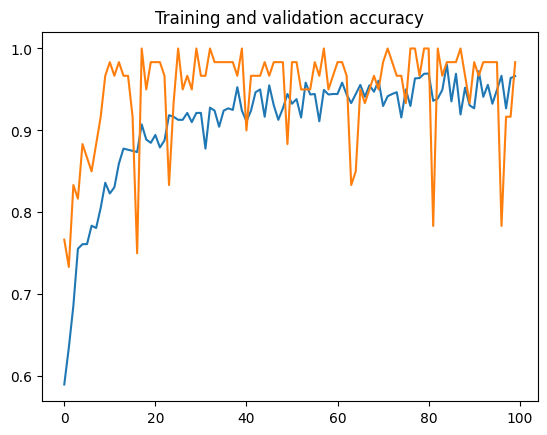

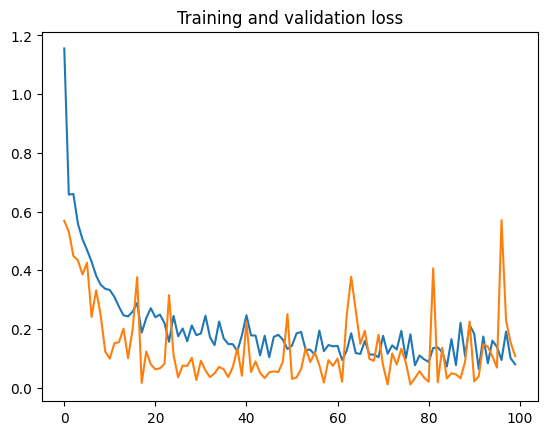

In [ ]:
acc      = history.history[     'accuracy' ]
val_acc  = history.history[ 'val_accuracy' ]
loss     = history.history[    'loss' ]
val_loss = history.history['val_loss' ]
epochs   = range(len(acc))

plt.plot  ( epochs,     acc )
plt.plot  ( epochs, val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [ ]:
result = model.evaluate_generator(validation_generator, 50)
print('Accuracy of this model : ', result[1])

<ipython-input-73-73bec26998ea>:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  result = model.evaluate_generator(validation_generator, 50)


Accuracy of this model :  0.9724137783050537


### Saved Model

In [ ]:
food_prediction = '/content/drive/My Drive/food-prediction.h5'

model.save(food_prediction, save_format="h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Load the model

In [ ]:

my_model = tf.keras.models.load_model(
    ('/content/drive/My Drive/food-prediction.h5'), custom_objects={'KerasLayer':hub.KerasLayer}
)

### Running Model Prediction

Saving 6_jpg.rf.fcfe09df45efe4a3e0c7c5a97ce72b66.jpg to 6_jpg.rf.fcfe09df45efe4a3e0c7c5a97ce72b66 (1).jpg


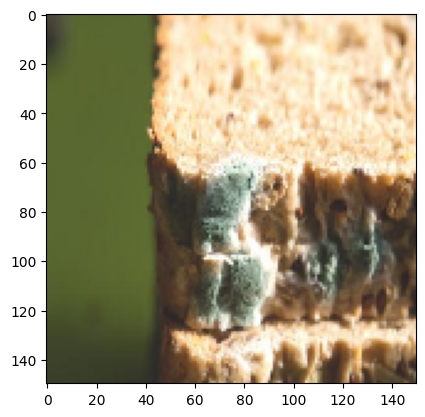

1/1 [==============================] - 0s 48ms/step
[[0.20384869 0.7961513 ]]
{'Makanan ini termasuk': 'roti kadaluarsa'}


In [ ]:

uploaded = files.upload()

label = ['roti yang masih layak dikonsumsi', 'roti kadaluarsa']

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    pred_arr = my_model.predict(images, batch_size=20)
    predict = np.argmax(pred_arr, axis=1)

    print(pred_arr)
    data = {'Makanan ini termasuk': label[predict[0]]}
    print(data)

Saving roti-tawar-11.jpg to roti-tawar-11 (5).jpg


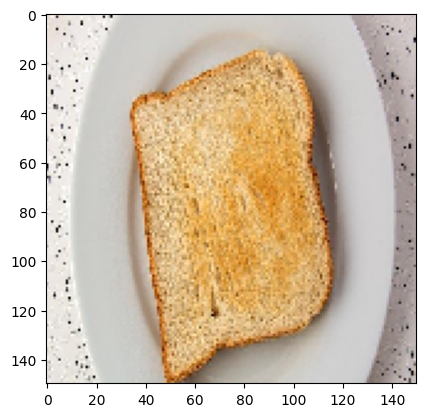

1/1 [==============================] - 0s 36ms/step
[[0.961739   0.03826095]]
{'Makanan ini termasuk': 'roti yang masih layak dikonsumsi'}


In [ ]:

uploaded = files.upload()

label = ['roti yang masih layak dikonsumsi', 'roti kadaluarsa']

for fn in uploaded.keys():
    path = fn
    img = image.load_img(path, target_size=(150, 150))
    plt.imshow(img)
    plt.show()

    x = image.img_to_array(img)
    x /= 255
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    pred_arr = my_model.predict(images, batch_size=20)
    predict = np.argmax(pred_arr, axis=1)

    print(pred_arr)
    data = {'Makanan ini termasuk': label[predict[0]]}
    print(data)

### Exporting to TF-Lite

In [ ]:
# Path to the saved model in h5 format
food_prediction = '/content/drive/My Drive/food-prediction.h5'

# Load the saved model
model = tf.keras.models.load_model(food_prediction)

# Convert the model to TFLite format
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the TFLite model to a file
tflite_file = '/content/drive/My Drive/food-prediction.tflite'
with open(tflite_file, 'wb') as f:
    f.write(tflite_model)

In [ ]:
interpreter = tf.lite.Interpreter(model_path='/content/drive/My Drive/food-prediction.tflite')
interpreter.allocate_tensors()

In [ ]:
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [ ]:
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()
output_data = interpreter.get_tensor(output_details[0]['index'])

In [ ]:
print (output_data)

[[1.0000000e+00 1.0283667e-10]]


### Testing predict using tflite model

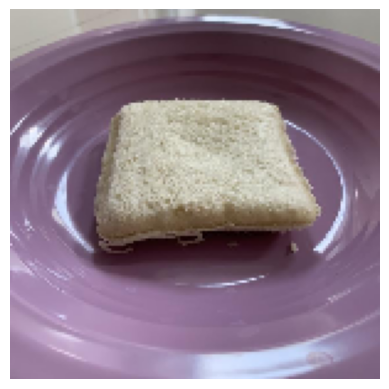

Makanan ini termasuk: Roti yang masih layak dikonsumsi


In [ ]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/food-prediction.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preprocess input image
input_shape = input_details[0]['shape']
input_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/datasets/test/roti yang masih layak dikonsumsi/IMG_E4434_JPG.rf.fe1e9351e33c4378811d5f5f6432a8f8.jpg', target_size=(input_shape[1], input_shape[2]))
input_array = tf.keras.preprocessing.image.img_to_array(input_image)
input_array = np.expand_dims(input_array, axis=0)
input_array = input_array.astype('float32') / 255.0  # Normalize input

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_array)

# Run inference
interpreter.invoke()

# Get the output tensor
output = interpreter.get_tensor(output_details[0]['index'])

# Get the predicted class label
predicted_class_index = np.argmax(output)
labels = ['Roti kadaluarsa', 'Roti yang masih layak dikonsumsi']  # Define your label names
predicted_label = labels[predicted_class_index]

# Display the image
plt.imshow(input_image)
plt.axis('off')
plt.show()

print('Makanan ini termasuk:', predicted_label)

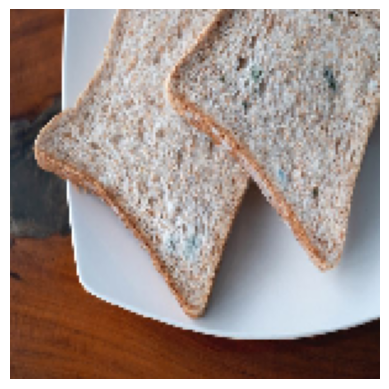

Makanan ini termasuk: Roti kadaluarsa


In [ ]:
# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/food-prediction.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preprocess input image
input_shape = input_details[0]['shape']
input_image = tf.keras.preprocessing.image.load_img('/content/drive/MyDrive/roti-berjamur.jpeg', target_size=(input_shape[1], input_shape[2]))
input_array = tf.keras.preprocessing.image.img_to_array(input_image)
input_array = np.expand_dims(input_array, axis=0)
input_array = input_array.astype('float32') / 255.0  # Normalize input

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_array)

# Run inference
interpreter.invoke()

# Get the output tensor
output = interpreter.get_tensor(output_details[0]['index'])

# Get the predicted class label
predicted_class_index = np.argmax(output)
labels = ['Roti kadaluarsa', 'Roti yang masih layak dikonsumsi']  # Define your label names
predicted_label = labels[predicted_class_index]

# Display the image
plt.imshow(input_image)
plt.axis('off')
plt.show()

print('Makanan ini termasuk:', predicted_label)

Saving IMG_E4493_JPG.rf.6711ab9e0f8b905a08ad78e04040453b.jpg to IMG_E4493_JPG.rf.6711ab9e0f8b905a08ad78e04040453b.jpg


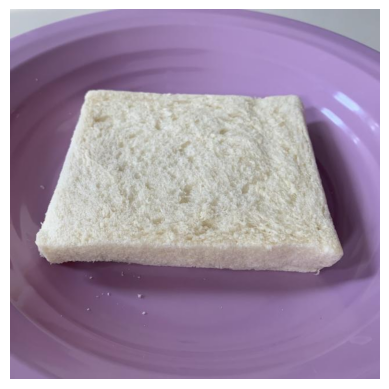

Makanan ini termasuk: Roti yang masih layak dikonsumsi


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

# Load the TFLite model and allocate tensors
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/food-prediction.tflite')
interpreter.allocate_tensors()

# Get input and output details
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Function to preprocess input image
def preprocess_input(image_path, input_shape):
    input_image = Image.open(image_path).resize((input_shape[1], input_shape[2]))
    input_array = tf.keras.preprocessing.image.img_to_array(input_image)
    input_array = np.expand_dims(input_array, axis=0)
    input_array = input_array.astype('float32') / 255.0  # Normalize input
    return input_array

# Upload image
uploaded = files.upload()

# Process uploaded image
for fn in uploaded.keys():
    image_path = fn
    input_array = preprocess_input(image_path, input_details[0]['shape'])

    # Set the input tensor
    interpreter.set_tensor(input_details[0]['index'], input_array)

    # Run inference
    interpreter.invoke()

    # Get the output tensor
    output = interpreter.get_tensor(output_details[0]['index'])

    # Get the predicted class label
    predicted_class_index = np.argmax(output)
    labels = ['Roti kadaluarsa', 'Roti yang masih layak dikonsumsi']  # Define your label names
    predicted_label = labels[predicted_class_index]

    # Display the image
    input_image = Image.open(image_path)
    plt.imshow(input_image)
    plt.axis('off')
    plt.show()

    print('Makanan ini termasuk:', predicted_label)

In [ ]:
with open('/content/drive/MyDrive/labels.txt', 'w') as file:
    file.write(labels[0] + '\n')
    file.write(labels[1] + '\n')